# Lab 5: Linear Selection & Regularization

In this lab we will get more comfortable setting up various classifiers in r.

## Goals of the lab:
* Learn to use the _regsubsets_ function.
* Learn to use the _glmnet_ function.
* Learn to use the _pcr_ function.

This lab draws from the practice sets at the end of Chapter 6 in James, G., Witten, D., Hastie, T., & Tibshirani, R. (2013). "An introduction to statistical learning: with applications in r." 

---
# Best subset selection

First we start with a tour of using the built in functions to best subset selection. For this we will load the [Hitters (baseball) dataset](https://vincentarelbundock.github.io/Rdatasets/doc/ISLR/Hitters.html) included in ILSR.

In [7]:
# -----------------------------
# 6.5.1 Best subset selection
# -----------------------------

# Load the Baseball dataset
library(ISLR)
names(Hitters)
dim(Hitters)

# Uncomment the line below to see the help function for the data set.
#help(Hitters)

[1] "AtBat"     "Hits"      "HmRun"     "Runs"      "RBI"       "Walks"    
 [7] "Years"     "CAtBat"    "CHits"     "CHmRun"    "CRuns"     "CRBI"     
[13] "CWalks"    "League"    "Division"  "PutOuts"   "Assists"   "Errors"   
[19] "Salary"    "NewLeague"

[1] 322  20

One thing to notice is that this data set has a lot of missing values that are indicated as "na" in r. R includes a library of functions that are useful for dealing with missing data. 

In [9]:
# R lets you filter out the empty values using na.omit

# Using na.omit make a new data set that only includes
# those observations where all variables are observed
Hitters=na.omit(Hitters)

dim(Hitters) # Notice that the dimensions reduced by 59 rows
sum(is.na(Hitters$Salary)) # But there are no longer any "na" values

[1] 263  20

[1] 0

Now that we've cleaned the data set a bit, let's work with best subset selection.

In [11]:
# We will perform subset selection using regsubsets(), that is 
# part of the leaps package

# Uncomment the line below if you haven't installed the leaps package yet
# install.packages("leaps")
library(leaps)

For this practice we will be using the [regsubsets function](https://www.rdocumentation.org/packages/leaps/versions/2.1-1/topics/regsubsets). Here let's see what statistics of a hitter's performance predict his annual salary. In this model we'll use all 19 variables other than Salary in the model.

In [13]:
# Form of model setup in regsubsets is regsubsets(model, data)
regfit.full = regsubsets(Salary~., Hitters)
summary(regfit.full) # Asterisks indicate that a field is included in the model

Subset selection object
Call: regsubsets.formula(Salary ~ ., Hitters)
19 Variables  (and intercept)
           Forced in Forced out
AtBat          FALSE      FALSE
Hits           FALSE      FALSE
HmRun          FALSE      FALSE
Runs           FALSE      FALSE
RBI            FALSE      FALSE
Walks          FALSE      FALSE
Years          FALSE      FALSE
CAtBat         FALSE      FALSE
CHits          FALSE      FALSE
CHmRun         FALSE      FALSE
CRuns          FALSE      FALSE
CRBI           FALSE      FALSE
CWalks         FALSE      FALSE
LeagueN        FALSE      FALSE
DivisionW      FALSE      FALSE
PutOuts        FALSE      FALSE
Assists        FALSE      FALSE
Errors         FALSE      FALSE
NewLeagueN     FALSE      FALSE
1 subsets of each size up to 8
Selection Algorithm: exhaustive
         AtBat Hits HmRun Runs RBI Walks Years CAtBat CHits CHmRun CRuns CRBI
1  ( 1 ) " "   " "  " "   " "  " " " "   " "   " "    " "   " "    " "   "*" 
2  ( 1 ) " "   "*"  " "   " "  " " " "   

The asterisks indicate when a field is included in the model. The way to interpret this summary is that each row indicates the variables to include with models of increasing complexity. The first row is a 1 dimensional model (i.e., 1 variable). The second row is a two dimensional model and so on.

By default _regsubsets()_ only reports up to the best model with _p=8_. So we'll want to expand that default maximum to include all 19 variables. For this we'll use the _nvmax_ option.

In [16]:
regfit.full = regsubsets(Salary~., Hitters, nvmax=19)
reg.summary = summary(regfit.full)
reg.summary

Subset selection object
Call: regsubsets.formula(Salary ~ ., Hitters, nvmax = 19)
19 Variables  (and intercept)
           Forced in Forced out
AtBat          FALSE      FALSE
Hits           FALSE      FALSE
HmRun          FALSE      FALSE
Runs           FALSE      FALSE
RBI            FALSE      FALSE
Walks          FALSE      FALSE
Years          FALSE      FALSE
CAtBat         FALSE      FALSE
CHits          FALSE      FALSE
CHmRun         FALSE      FALSE
CRuns          FALSE      FALSE
CRBI           FALSE      FALSE
CWalks         FALSE      FALSE
LeagueN        FALSE      FALSE
DivisionW      FALSE      FALSE
PutOuts        FALSE      FALSE
Assists        FALSE      FALSE
Errors         FALSE      FALSE
NewLeagueN     FALSE      FALSE
1 subsets of each size up to 19
Selection Algorithm: exhaustive
          AtBat Hits HmRun Runs RBI Walks Years CAtBat CHits CHmRun CRuns CRBI
1  ( 1 )  " "   " "  " "   " "  " " " "   " "   " "    " "   " "    " "   "*" 
2  ( 1 )  " "   "*"  " "  

We now have a full evaluation of the best subset selection. So to find which of these subsets is the best model we'll have to evaluate the bias-adjusted model fit measures that are output.

In [18]:
# See what is included in the summary object
names(reg.summary)

[1] "which"  "rsq"    "rss"    "adjr2"  "cp"     "bic"    "outmat" "obj"

In [31]:
# You can directly query which terms are included at each level of complexity
reg.summary$which

,(Intercept),AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,LeagueN,DivisionW,PutOuts,Assists,Errors,NewLeagueN
1,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
2,TRUE,FALSE,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
3,TRUE,FALSE,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,TRUE,FALSE,FALSE,FALSE,TRUE,FALSE,FALSE,FALSE
4,TRUE,FALSE,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,TRUE,FALSE,FALSE,TRUE,TRUE,FALSE,FALSE,FALSE
5,TRUE,TRUE,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,TRUE,FALSE,FALSE,TRUE,TRUE,FALSE,FALSE,FALSE
6,TRUE,TRUE,TRUE,FALSE,FALSE,FALSE,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,TRUE,FALSE,FALSE,TRUE,TRUE,FALSE,FALSE,FALSE
7,TRUE,FALSE,TRUE,FALSE,FALSE,FALSE,TRUE,FALSE,TRUE,TRUE,TRUE,FALSE,FALSE,FALSE,FALSE,TRUE,TRUE,FALSE,FALSE,FALSE
8,TRUE,TRUE,TRUE,FALSE,FALSE,FALSE,TRUE,FALSE,FALSE,FALSE,TRUE,TRUE,FALSE,TRUE,FALSE,TRUE,TRUE,FALSE,FALSE,FALSE
9,TRUE,TRUE,TRUE,FALSE,FALSE,FALSE,TRUE,FALSE,TRUE,FALSE,FALSE,TRUE,TRUE,TRUE,FALSE,TRUE,TRUE,FALSE,FALSE,FALSE
10,TRUE,TRUE,TRUE,FALSE,FALSE,FALSE,TRUE,FALSE,TRUE,FALSE,FALSE,TRUE,TRUE,TRUE,FALSE,TRUE,TRUE,TRUE,FALSE,FALSE


In [24]:
# Take a peak at the adjusted r-squares
reg.summary$adjr2

[1] 0.3188503 0.4208024 0.4450753 0.4672734 0.4808971 0.4972001 0.5007849
 [8] 0.5137083 0.5180572 0.5222606 0.5225706 0.5217245 0.5206736 0.5195431
[15] 0.5178661 0.5162219 0.5144464 0.5126097 0.5106270

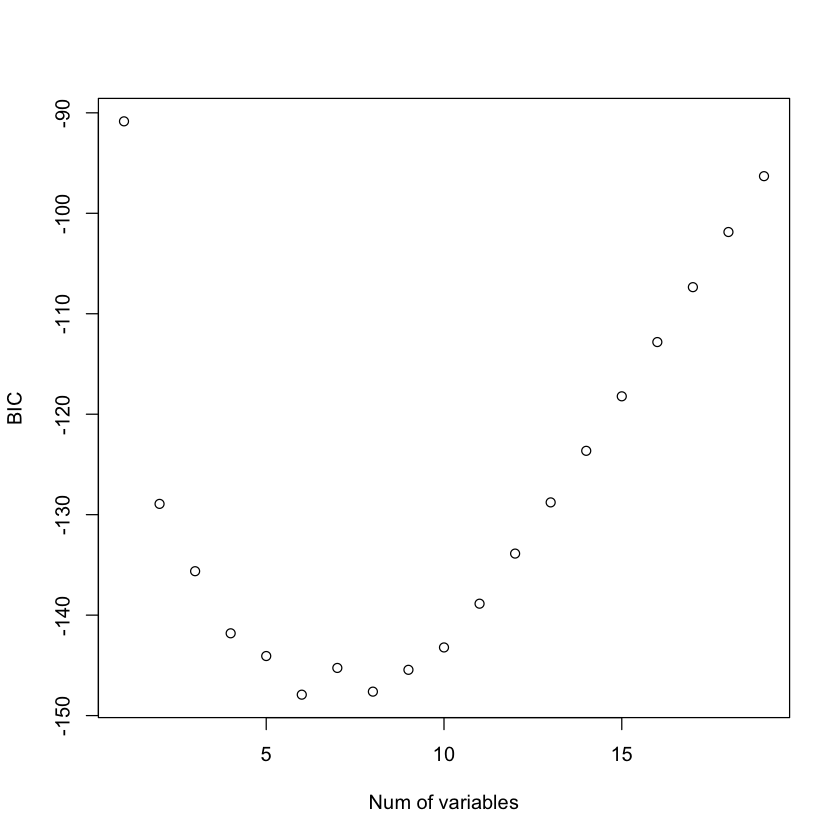

In [21]:
# Plot the BICs for all the best models
plot(reg.summary$bic, xlab="Num of variables", ylab="BIC")

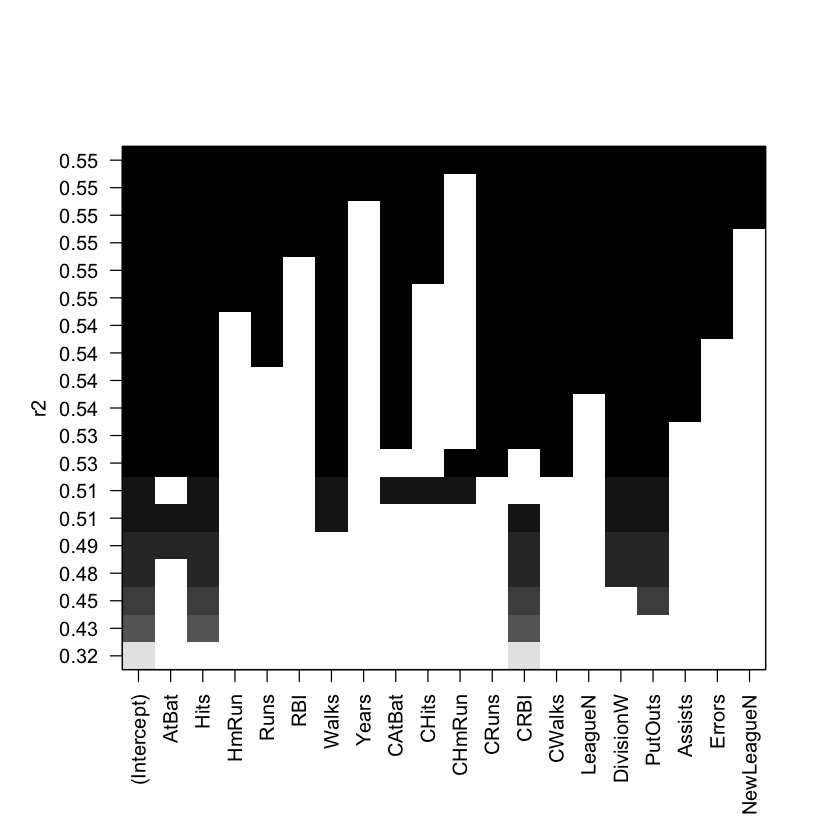

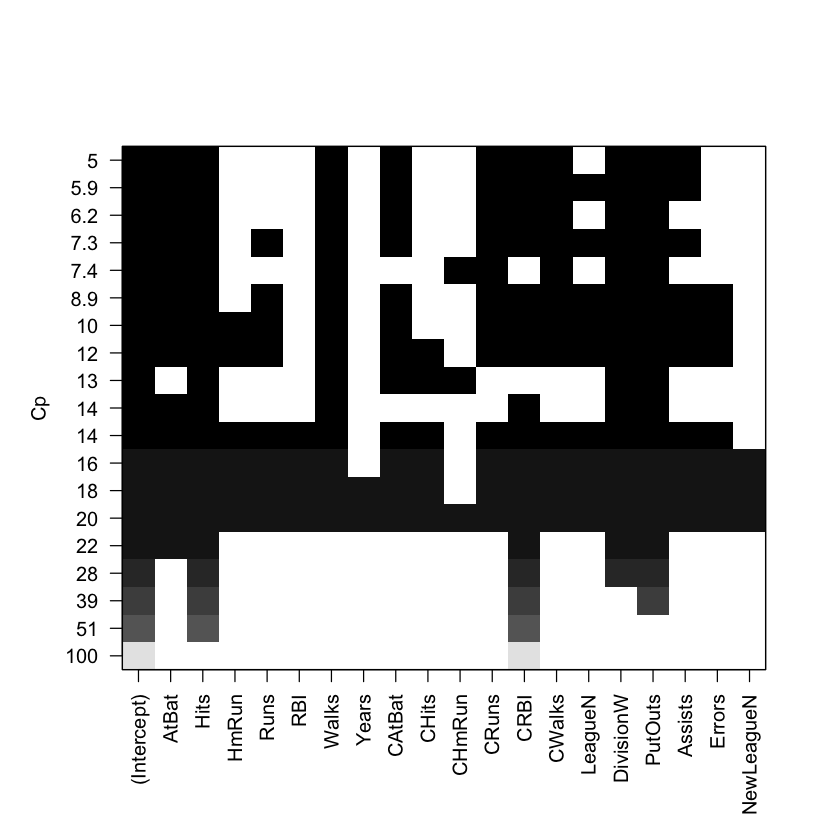

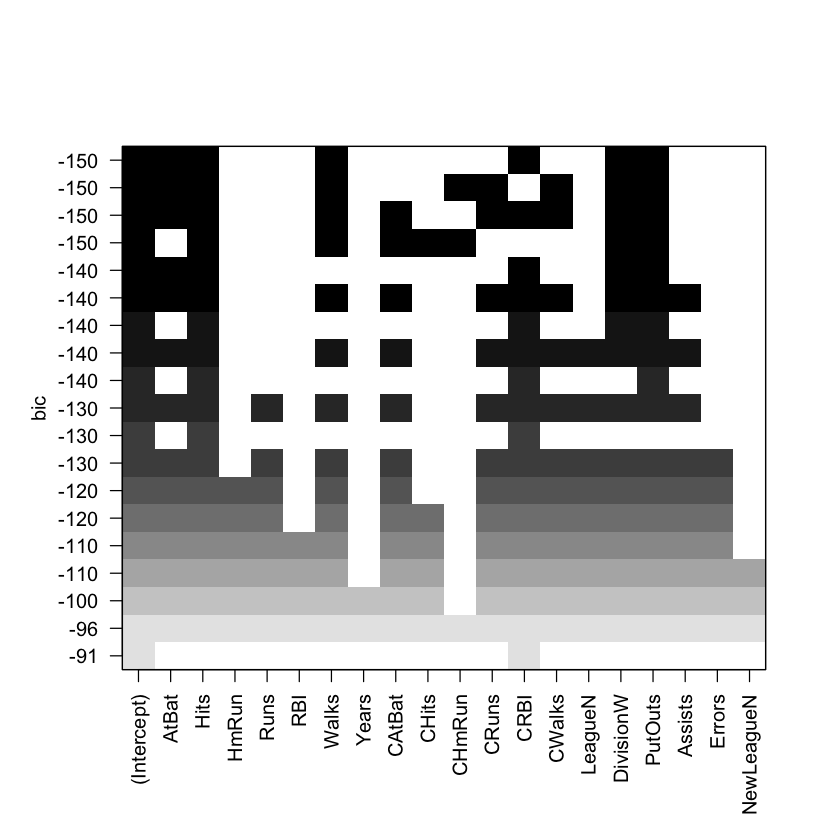

In [25]:
# You can also use the built in plots from regsubset()
plot(regfit.full, scale="r2")
plot(regfit.full, scale="Cp")
plot(regfit.full, scale="bic")

In [26]:
# identify which has the best fit
which.min(reg.summary$bic)
which.min(reg.summary$adjr2)
which.min(reg.summary$cp)

[1] 6

[1] 1

[1] 10

So here we get a clear discrepency between each of the bias-adjustd model evaluation measures as to which is the best model to use. Clearly this isn't an easy question to answer.

---
# Ridge Regression
<br>
Now we'll try to ask the same question using ridge regression instead. For this we'll want to use the [_glmnet_ package](https://cran.r-project.org/web/packages/glmnet/glmnet.pdf). 

In [52]:
# -----------------------------
# 6.6.1 Ridge regression
# -----------------------------

# Uncomment the following line if glmnet isn't installed yet
# install.packages("glmnet")
library(glmnet)

Remember that you need to find the best tuning parameter ($\lambda$) to use. This determins the sparsity of the model.

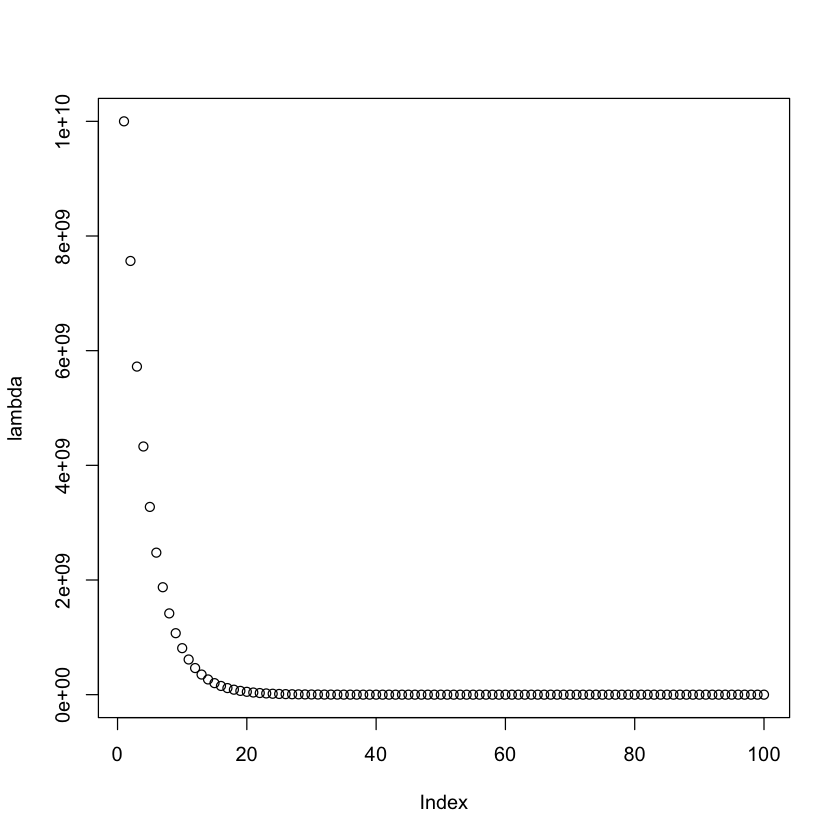

In [35]:
# Use a non-linear search on lambda
grid = 10^seq(10, -2, length=100)
plot(grid, ylab="lambda")

In [36]:
# Let's setup our x & y separately
# Define x without the first column
x = model.matrix(Salary~., Hitters)[,-1]
y = Hitters$Salary

Now, technically you are running _elastic net_ when using the _glmnet_ function. So we need to set $\alpha$ to zero in order to run pure ridge regression.

In [37]:
ridge.mod = glmnet(x, y, alpha=0, lambda=grid)

Remember that ridge regression returns all _p_ variables for each value of $\lambda$. Thus we get a matrix of regression coefficients instead of a vector.

In [38]:
dim(coef(ridge.mod))

[1]  20 100

Let's look at all 20 coefficients (including the intercept) when $\lambda = 11497.57$ (i.e., the 50th entry in the $\lambda$ vector)

[1] 11497.57

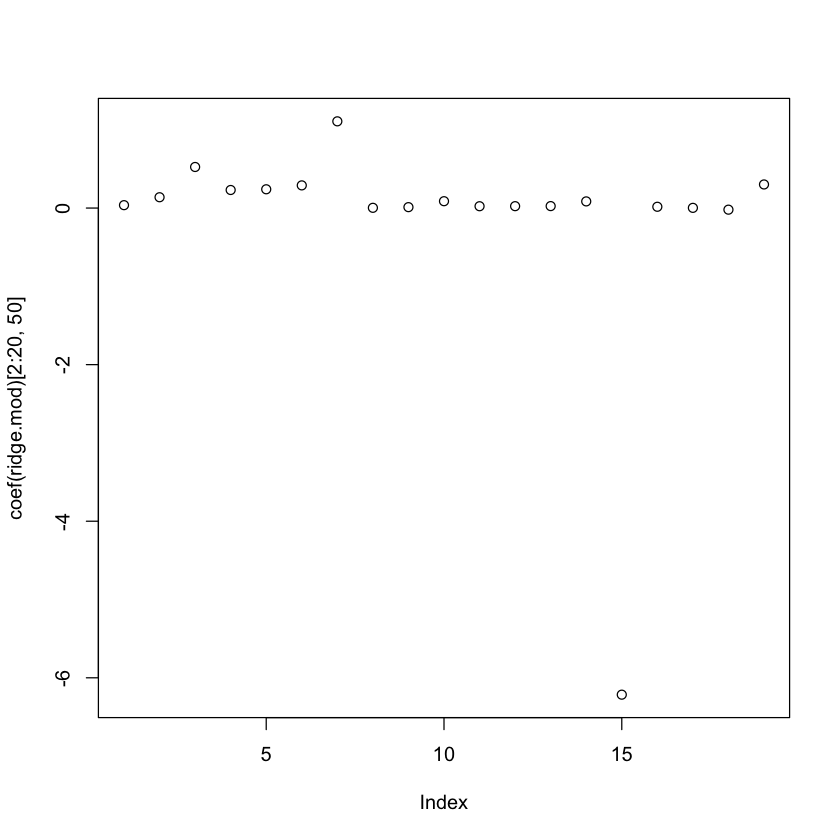

In [39]:
grid[50]
plot(coef(ridge.mod)[2:20,50])

Here you can see that many of them are near zero in value while a few terms retain strong, non-zero values. 

Now what happens if we set $\lambda$ really _really_ high?

[1] 5722367659

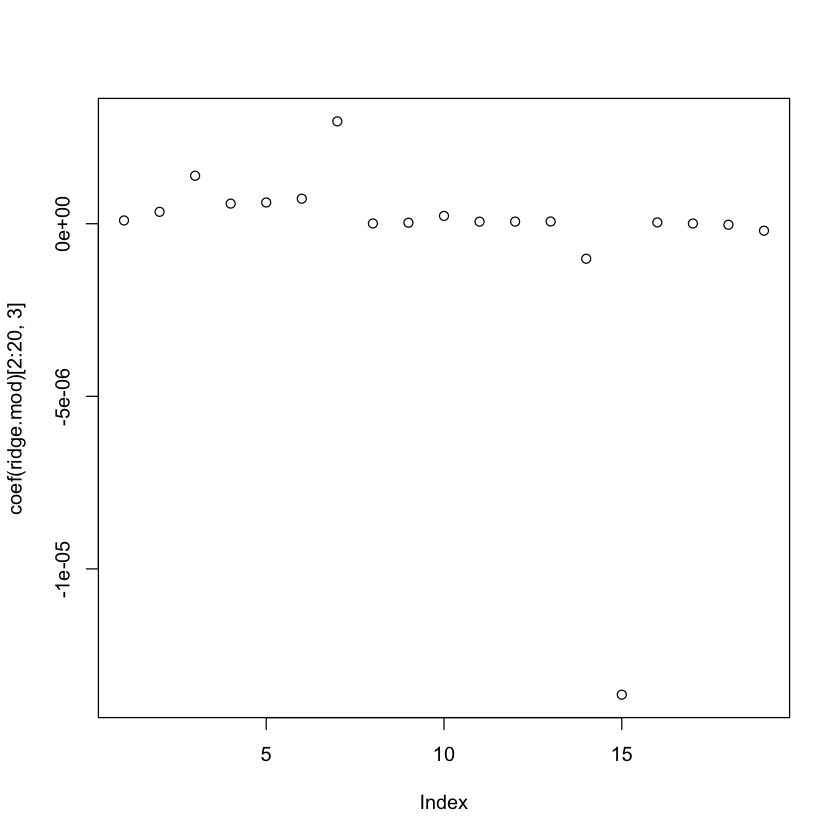

In [40]:
grid[3]
plot(coef(ridge.mod)[2:20,3])

Notice a difference between when $\lambda = 11498$ and when $\lambda = 5722367659$? Hint: Look at the y-axis.

Now you can really test any value of $\lambda$ that you want. For this just use the _predict()_ function.

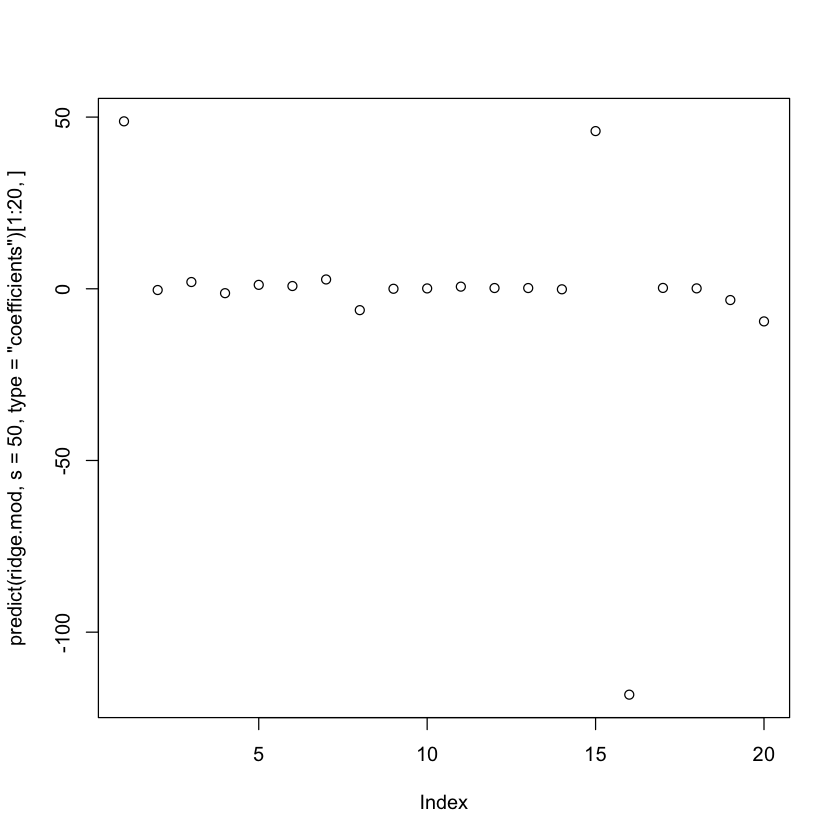

In [41]:
plot(predict(ridge.mod, s=50, type="coefficients")[1:20,])

Remember, if we want to interpret the predictive utility of this model we are double dipping. Because you are selecting $\lambda$ on the same data you used to fit the model. You will want to cross-validate to find the best $\lambda$.

In [46]:
set.seed(1) # Use the same seed as me so we get the same results

# Setup your validation sets
train=sample(1:nrow(x), nrow(x)/2)
test=(-train)
y.test = y[test]

# Make a training model using the training set (for all values of lambda)
ridge.mod = glmnet(x[train,], y[train], alpha=0, lambda=grid, thresh=1e-12)

Now that we have this setup, let's play around with the training fits using different $\lambda$.

In [48]:
# With lambda = 4
ridge.pred = predict(ridge.mod, s=4, newx=x[test,])
mean((ridge.pred -y.test)^2)

# With lambda = 10^10
ridge.pred = predict(ridge.mod, s=1e10, newx=x[test,])
mean((ridge.pred -y.test)^2)

# With lambda = 0 (note this is OLS)
ridge.pred = predict(ridge.mod, s=0, newx=x[test,])
mean((ridge.pred -y.test)^2)

[1] 101036.8

[1] 193253.1

[1] 114723.6

When $\lambda$ was large, the MSE was better than OLS. But when it is too small it gets worse. Hence we need to maximize the bias-variance tradeoff.

Given the examples above, you see how it's easy to do the full cross valiation to find the best $\lambda$.

[1] 211.7416

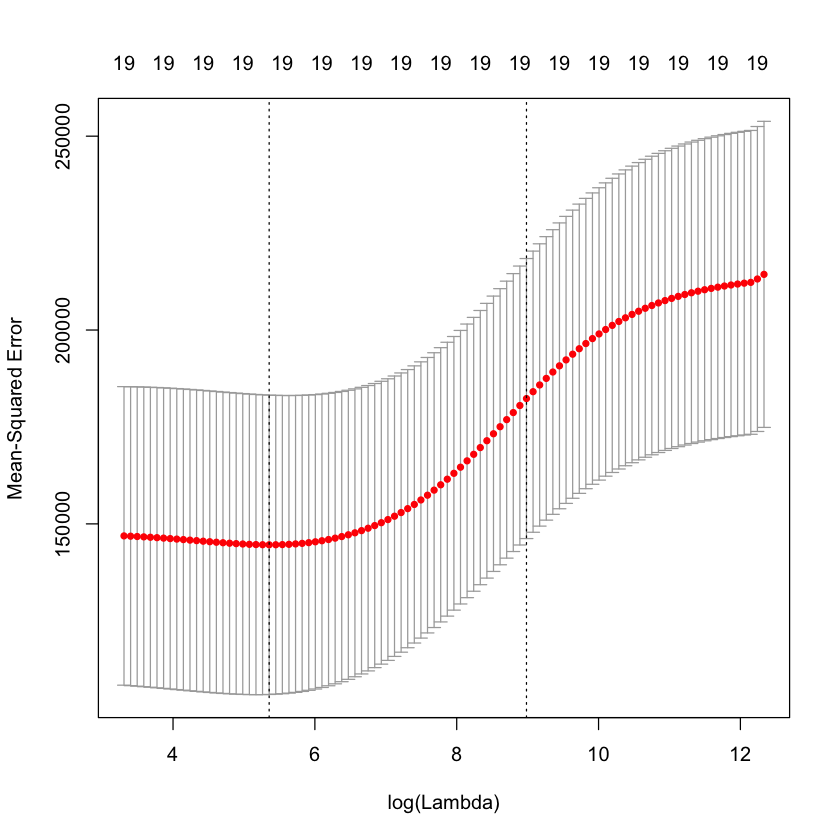

In [49]:
# Using LOOCV
set.seed(1)
cv.out = cv.glmnet(x[train,], y[train], alpha=0)
plot(cv.out)
bestlam = cv.out$lambda.min
bestlam

According to the _training set_, the best $\lambda$ to use is $\lambda = 211.7416$. 

We can use this value of $\lambda$ to see our hold out test accuracy.

In [50]:
ridge.pred = predict(ridge.mod, s=bestlam, newx=x[test,])
mean((ridge.pred -y.test)^2)

[1] 96015.51

Note that this is _much better than_ the previous MSE we got before just looking by hand. Now we can get the coeffficients themselves for inference purposes.

Using this lambda we can also get the actual regression coefficients for all 20 parameters in the model (including the intercept).

In [51]:
# First setup the model
out = glmnet(x,y, alpha=0)

# Then predict.
predict(out, type="coefficients", s=bestlam)[1:20,]

(Intercept)        AtBat         Hits        HmRun         Runs          RBI 
  9.88487157   0.03143991   1.00882875   0.13927624   1.11320781   0.87318990 
       Walks        Years       CAtBat        CHits       CHmRun        CRuns 
  1.80410229   0.13074383   0.01113978   0.06489843   0.45158546   0.12900049 
        CRBI       CWalks      LeagueN    DivisionW      PutOuts      Assists 
  0.13737712   0.02908572  27.18227527 -91.63411282   0.19149252   0.04254536 
      Errors   NewLeagueN 
 -1.81244470   7.21208394

---
# LASSO

In order to run LASSO, you repeat the same steps as shown in the example above but replace alpha=0 to alpha=1. 

Alternatively, if you want to do a full elastic net procedure, you  would also fit a range of alpha parameters as well as lambda.

For the sake of time, we will move onto PCR. Go ahead and play with the code in the previous section to test out 1) the LASSO approach (i.e., $\alpha =1$) and 2) an _elastic net_ approach (i.e. $0<\alpha<1$).

---
# Principal Components Regression (PCR)

The function for executing PCR is part of the [_pls_ package](https://cran.r-project.org/web/packages/pls/pls.pdf). 

In [54]:
# -----------------------------
# 6.7.1 Principal Components Regression (PCR)
# -----------------------------

# Uncomment the next line if you do not have pls package installed
# install.packages("pls")
library(pls)

Let's run a PCR on the same data set we have been playing with so far. 

Pay attention to two options in the _pcr()_ function.

* _scale_ = TRUE to standardize the coefficients (z-score)
* _validation_ = setting to "CV" causes pcr to use a 10-fold cross-validation

In [55]:
set.seed(2)
pcr.fit = pcr(Salary~., data=Hitters, scale=TRUE, validation="CV")
summary(pcr.fit)

Data: 	X dimension: 263 19 
	Y dimension: 263 1
Fit method: svdpc
Number of components considered: 19

VALIDATION: RMSEP
Cross-validated using 10 random segments.
       (Intercept)  1 comps  2 comps  3 comps  4 comps  5 comps  6 comps
CV             452    348.9    352.2    353.5    352.8    350.1    349.1
adjCV          452    348.7    351.8    352.9    352.1    349.3    348.0
       7 comps  8 comps  9 comps  10 comps  11 comps  12 comps  13 comps
CV       349.6    350.9    352.9     353.8     355.0     356.2     363.5
adjCV    348.5    349.8    351.6     352.3     353.4     354.5     361.6
       14 comps  15 comps  16 comps  17 comps  18 comps  19 comps
CV        355.2     357.4     347.6     350.1     349.2     352.6
adjCV     352.8     355.2     345.5     347.6     346.7     349.8

TRAINING: % variance explained
        1 comps  2 comps  3 comps  4 comps  5 comps  6 comps  7 comps  8 comps
X         38.31    60.16    70.84    79.03    84.29    88.63    92.26    94.96
Salary    4

The output you get shows an adjusted root mean squared error (RMSE) for as many components as you have access to (19 here). These are shown in _ascending order_ (i.e., in order of decreasing variance explained).

We can visualize the results using the _validationplot()_ function included in the _pls_ package.

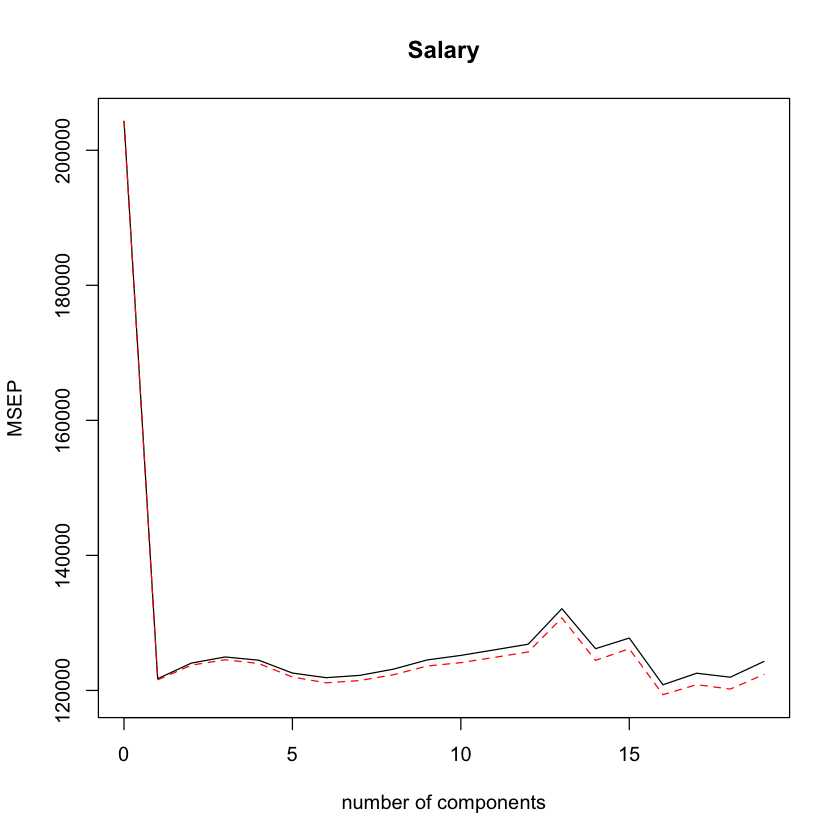

In [56]:
validationplot(pcr.fit, val.type="MSEP")

Notice that the lowest MSE is the model with 16 components, which barely beats out when only 1 component is used.

So let's do the validation test correctly in order to find the right number of components to use in the model and then evaluate the hold-out _test set_ error.

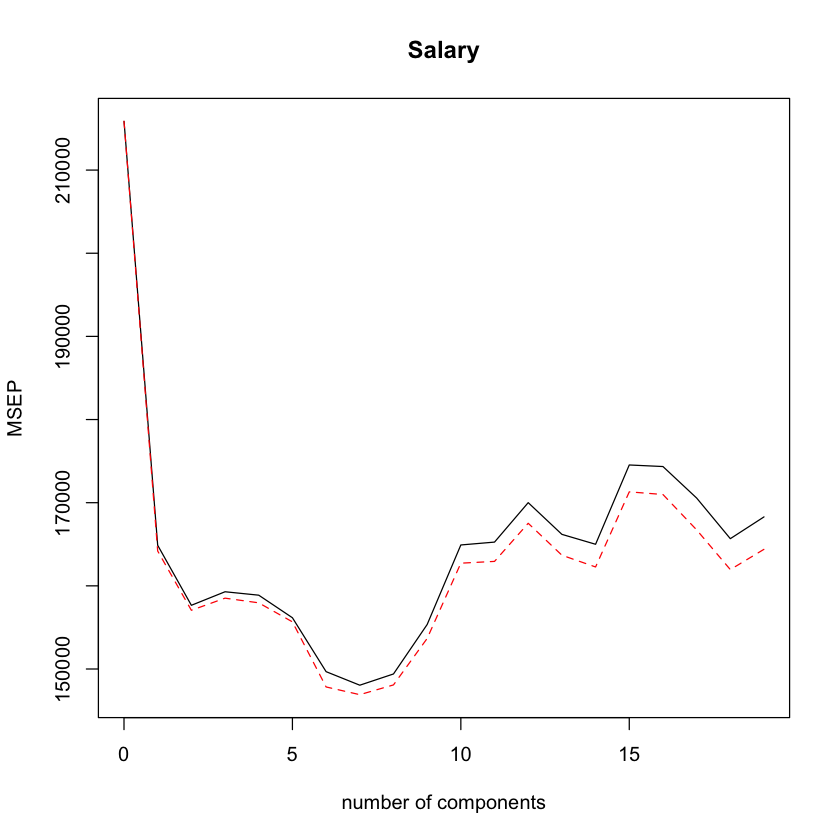

In [57]:
set.seed(1)
pcr.fit = pcr(Salary~., data=Hitters, scale=TRUE, subset=train, validation="CV")
validationplot(pcr.fit, val.type="MSEP")

The _summary()_ function is going to be useful here for finding the best value.

In [58]:
summary(pcr.fit)

Data: 	X dimension: 131 19 
	Y dimension: 131 1
Fit method: svdpc
Number of components considered: 19

VALIDATION: RMSEP
Cross-validated using 10 random segments.
       (Intercept)  1 comps  2 comps  3 comps  4 comps  5 comps  6 comps
CV           464.6    406.1    397.1    399.1    398.6    395.2    386.9
adjCV        464.6    405.2    396.3    398.1    397.4    394.5    384.5
       7 comps  8 comps  9 comps  10 comps  11 comps  12 comps  13 comps
CV       384.8    386.5    394.1     406.1     406.5     412.3     407.7
adjCV    383.3    384.8    392.0     403.4     403.7     409.3     404.6
       14 comps  15 comps  16 comps  17 comps  18 comps  19 comps
CV        406.2     417.8     417.6     413.0     407.0     410.2
adjCV     402.8     413.9     413.5     408.3     402.4     405.5

TRAINING: % variance explained
        1 comps  2 comps  3 comps  4 comps  5 comps  6 comps  7 comps  8 comps
X         38.89    60.25    70.85    79.06    84.01    88.51    92.61    95.20
Salary    2

We see that the best fit, using both traditional and adjusted-CV criterion, is the model that uses 7 principal components.

So let's take that model and evaluate the best _test fit_.

In [59]:
pcr.pred = predict(pcr.fit, x[test,], ncomp=7)
mean((pcr.pred-y.test)^2)

[1] 96556.22

This is the best fit that maximizes the bias-variance tradeoff.

In order to find the regression coefficients from this model, we can recombine the training and test subsets back to the full data set and estimate using the 7 PC model.

In [60]:
# Finally, we can use PCR on the entire data set to get the right coefficients
prc.fit = pcr(y~x, scale=TRUE, ncomp=7)
summary(pcr.fit)

Data: 	X dimension: 131 19 
	Y dimension: 131 1
Fit method: svdpc
Number of components considered: 19

VALIDATION: RMSEP
Cross-validated using 10 random segments.
       (Intercept)  1 comps  2 comps  3 comps  4 comps  5 comps  6 comps
CV           464.6    406.1    397.1    399.1    398.6    395.2    386.9
adjCV        464.6    405.2    396.3    398.1    397.4    394.5    384.5
       7 comps  8 comps  9 comps  10 comps  11 comps  12 comps  13 comps
CV       384.8    386.5    394.1     406.1     406.5     412.3     407.7
adjCV    383.3    384.8    392.0     403.4     403.7     409.3     404.6
       14 comps  15 comps  16 comps  17 comps  18 comps  19 comps
CV        406.2     417.8     417.6     413.0     407.0     410.2
adjCV     402.8     413.9     413.5     408.3     402.4     405.5

TRAINING: % variance explained
        1 comps  2 comps  3 comps  4 comps  5 comps  6 comps  7 comps  8 comps
X         38.89    60.25    70.85    79.06    84.01    88.51    92.61    95.20
Salary    2

In order to now understand how these relate back to the original variables, we can look at the loading matrix to understand how much each variable "loads" (or relates to) each PC.

In [61]:
pcr.fit$loadings


Loadings:
           Comp 1 Comp 2 Comp 3 Comp 4 Comp 5 Comp 6 Comp 7 Comp 8 Comp 9
AtBat      -0.211  0.381                                     0.254       
Hits       -0.206  0.382                             -0.136  0.314 -0.115
HmRun      -0.200  0.210  0.135 -0.327         0.347  0.432 -0.228  0.188
Runs       -0.198  0.378                             -0.227        -0.186
RBI        -0.238  0.306        -0.143         0.202  0.273              
Walks      -0.209  0.234        -0.113        -0.182 -0.538 -0.552       
Years      -0.277 -0.274                                     0.243 -0.111
CAtBat     -0.332 -0.185         0.104                       0.160       
CHits      -0.334 -0.170                                     0.199       
CHmRun     -0.309 -0.164                              0.170 -0.326  0.200
CRuns      -0.342 -0.158                                                 
CRBI       -0.334 -0.190                              0.106              
CWalks     -0.317 -0.184   

---
# Partial Least Squares (PLS)

The _pls()_ function is executed the exact same way as _pcr()_. Change the function calls above from _pcr_ to _pls_ and see what differences you get.